In [1]:
import os, sys, json, copy, random, pickle, time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# set to my fork with fix on server
# sys.path.insert(0, '../../../myfastai')
# set to dev-head on local
sys.path.insert(0, '../../../fastaif')
import fastai
print(fastai.__version__)

from fastai.vision import *
from fastai.utils.mem import  gpu_mem_get_free_no_cache

%reload_ext autoreload
%autoreload 2

from modules.ap3data import build_data
from modules.ap3graph import pred_cmp_viz

from modules.miscutils import ( scp_from_gcloud
                               ,move_file_obj
                               ,fastai_version
                              )
from modules.modeleval import ( calc_sse
                               ,calc_mse
                               ,err_to_np
                               ,ModelHome
                               ,Residuals
                              )

1.0.53.dev0


In [2]:
# the two datasets for apfit2-X models

data_small = build_data(batch_size=16, 
                        size=(216, 324), 
                        valid_pct=0.2,
                        )
data_large = build_data(batch_size=16, 
                        size=(288, 432), 
                        valid_pct=0.2,
                        )

all validations pass
all validations pass


In [85]:
m1 = ModelHome(
                model_arch=models.resnet50,
                dataset=data_large,
                pth_fn='new-models/apfit2-1.pth',
                name='apfit2-1',
                history_fn='new-models/apfit2-1.csv',
                preds_fn='misc-data/preds-apfit2-1.pickle',
                )

In [86]:
m4 = ModelHome(
                model_arch=models.resnet34,
                dataset=data_small,
                pth_fn='new-models/apfit2-4.pth',
                name='apfit2-4',
                history_fn='new-models/apfit2-4.csv',
                preds_fn='misc-data/preds-apfit2-4.pickle',
                )

##### Use pred_cmp_viz()
there are three ways shown here:

 - on validation set, with known i-value
 - on training set , with random i-value
 - calc'ing then passing in list_preds, not list_mh

In [104]:
# validation index outcomes

# bad ones:
# 1110 - bad miss for good model
# 1008 - bad miss for both
# 649 - bad miss both
# 390 - bad miss both
# 755 - worst model regression from bad-model to good-model

# good ones:
# 0 - good for good-model, bad for bad-model
# 70 is decent
# 919 - decent for both
# 558
# 216 - excellent for both

#training index outcomes
#390 - good
#672 - decent

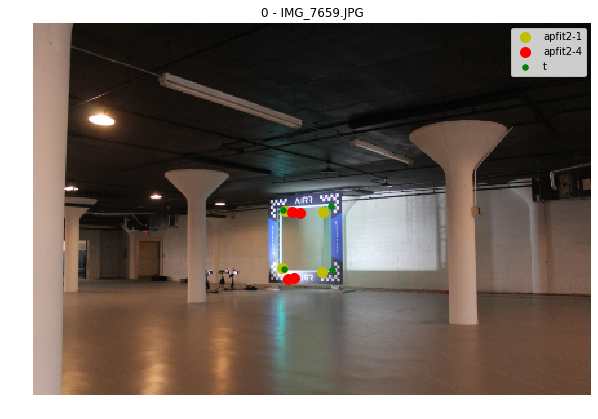

In [15]:
# compare on training set
pred_cmp_viz([m1, m4], add_truth = True, legend=True, i=0 )

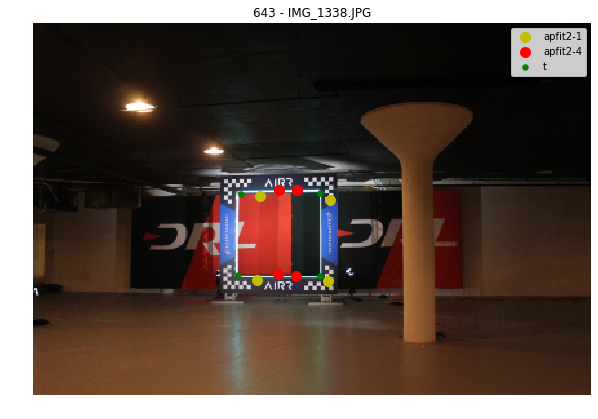

In [112]:
#trainers
pred_cmp_viz( list_mh = [m1, m4]
             ,add_truth = True
             ,legend=True
             ,b_train=True
             ,i=None
            )

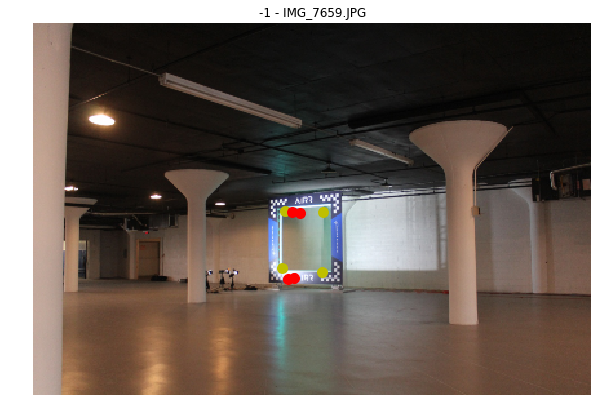

In [107]:
# pass-in prediction inputs
img0 = m1.dataset.valid_dl.get(0)
fn0 = m1.dataset.valid_dl.items[0]
preds = [m1.model.predict(img0)[2], m4.model.predict(img0)[2]]

pred_cmp_viz(list_mh=None,i=-1,list_preds=preds,preds_input=(fn0,img0))